# Project - Anomaly Detection Final Notebook

## Goal:
- To answer questions refering to Codeup Curriculum Access Logs

### Imports:

In [23]:

# imports
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from sklearn import metrics
from random import randint
from matplotlib import style
import env 
import warnings
warnings.filterwarnings("ignore")
import wrangle as w


## Acquire

Grab the logs from MySQL

In [24]:
df = w.get_curlogs()

In [25]:
df.shape

(900223, 6)

Grab the cohorts df from MySQL

In [26]:
df2 = w.get_cohorts()

In [27]:
df2.shape

(53, 9)

## Prepare

- First Combine both dataframes
- Fill NaN's with -1
- Change 'cohort_id' to an 'int' type
- Set index to date column as date type
- Create 2 Columns, 'endpoint' and 'startpoint'
- Drop 'time', 'slack', 'deleted_at', 'created_at', 'updated_at' Since we didn't use them for explore.

In [28]:
df = w.prep_logs(df, df2)

In [29]:
df.shape

(900223, 12)

In [30]:
w.check_columns(df)

Total rows: 900223
Total columns: 12


,col_name,dtype,num_unique,num_null,pct_null,unique_values,"range (min, max, mean)"
0,date,datetime64[ns],1182,0,0.00000,"[2018-01-26 00:00:00, 2018-01-27 00:00:00, 201...",None
1,path,object,2314,0,0.00000,"[/, java-ii, java-ii/object-oriented-programmi...",None
2,user_id,int64,981,0,0.00000,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[1.0, 981.0, 458.82570651938465]"
3,cohort_id,int64,48,0,0.00000,"[8, 22, 21, 1, 16, 18, 19, -1, 13, 14, 15, 7, ...","[-1.0, 139.0, 45.592593168581566]"
4,ip,object,5531,0,0.00000,"[97.105.19.61, 71.137.146.71, 209.205.123.242,...",None
5,id,float64,47,52893,0.05876,"[8.0, 22.0, 21.0, 1.0, 16.0, 18.0, 19.0, nan, ...","[1.0, 139.0, 48.501049178006205]"
6,name,object,47,52893,0.05876,"[Hampton, Teddy, Sequoia, Arches, Niagara, Pin...",None
7,start_date,object,44,52893,0.05876,"[2015-09-22, 2018-01-08, 2017-09-27, 2014-02-0...",None
8,end_date,object,45,52893,0.05876,"[2016-02-06, 2018-05-17, 2018-02-15, 2014-04-2...",None
9,program_id,float64,4,52893,0.05876,"[1.0, 2.0, nan, 4.0, 3.0]","[1.0, 4.0, 2.0860042722434]"


In [31]:
df.head()

,date,path,user_id,cohort_id,ip,id,name,start_date,end_date,program_id,endpoint,startpoint
date,,,,,,,,,,,,
2018-01-26,2018-01-26,/,1,8,97.105.19.61,8.0,Hampton,2015-09-22,2016-02-06,1.0,,
2018-01-26,2018-01-26,java-ii,1,8,97.105.19.61,8.0,Hampton,2015-09-22,2016-02-06,1.0,java-ii,java-ii
2018-01-26,2018-01-26,java-ii/object-oriented-programming,1,8,97.105.19.61,8.0,Hampton,2015-09-22,2016-02-06,1.0,object-oriented-programming,java-ii
2018-01-26,2018-01-26,slides/object_oriented_programming,1,8,97.105.19.61,8.0,Hampton,2015-09-22,2016-02-06,1.0,object_oriented_programming,slides
2018-01-26,2018-01-26,javascript-i/conditionals,2,22,97.105.19.61,22.0,Teddy,2018-01-08,2018-05-17,2.0,conditionals,javascript-i


### Data dictionary:

| Feature | Definition |
|--------|-----------|
|date| date accessed, datetime64|
|path| complete filepath, object|
|user_id| user specific id number, int64|
|cohort_id| number associated with cohort name, int64|
|ip| ip address, object|
|id| number associated with cohort name, float|
|name| cohort name, object|
|start_date| start date for user in cohort|
|end_date| end date for user in cohort|
|program_id| number associated with program type, float|
|endpoint| end of file path, object|
|startpoint| start of file path, object|

## Explore

### 1. Which lesson appears to attract the most traffic consistently across cohorts (per program)?


In [32]:
# Split df by program_id and take top ten paths
pgm1, pgm2, pgm3, pgm4 = w.split_by_program(df)

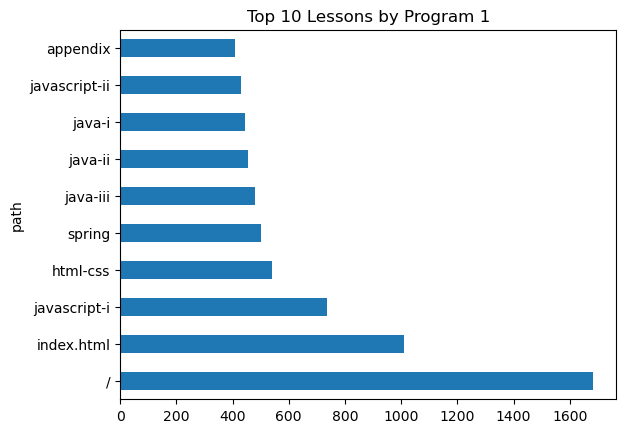

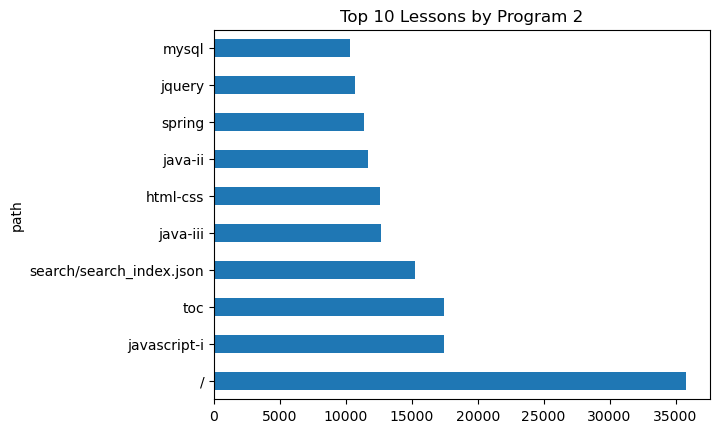

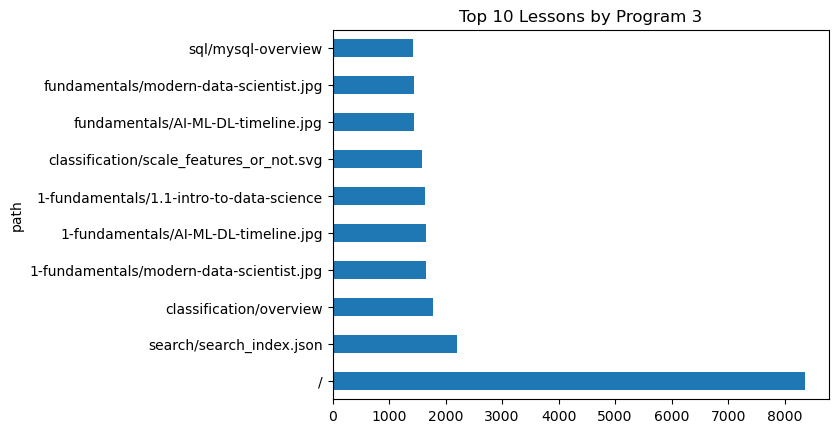

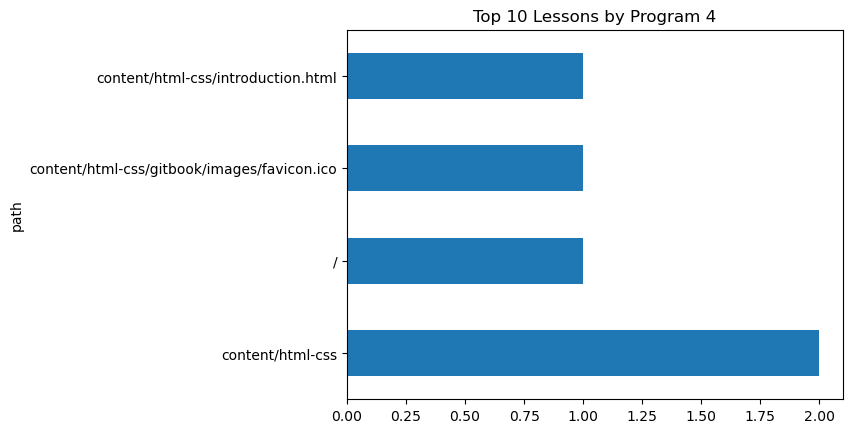

In [33]:
pgm1.path.value_counts().head(10).plot.barh()
plt.title('Top 10 Lessons by Program 1')
plt.show()
pgm2.path.value_counts().head(10).plot.barh()
plt.title('Top 10 Lessons by Program 2')
plt.show()
pgm3.path.value_counts().head(10).plot.barh()
plt.title('Top 10 Lessons by Program 3')
plt.show()
pgm4.path.value_counts().head(10).plot.barh()
plt.title('Top 10 Lessons by Program 4')
plt.show()

### Program 1 - Javascript i <p>
### Program 2 - Javascript i<p>
### Program 3 - Classification<p>
### Program 4 - HTML-CSS<p>

### 2. Is there a cohort that referred to a lesson significantly more than other cohorts seemed to gloss over?

In [34]:
status_given_cohort = (df.groupby('name').path.value_counts(normalize=True).rename('prob_path_giving_cohort').reset_index())
status_given_cohort.sort_values('prob_path_giving_cohort', ascending=False).head(10)

,name,path,prob_path_giving_cohort
4100,Everglades,/,1.000000
639,Apollo,content/html-css,0.400000
3600,Denali,prework/databases,0.250000
3601,Denali,mkdocs/search_index.json,0.250000
3602,Denali,/,0.250000
3599,Denali,prework/versioning/github,0.250000
642,Apollo,content/html-css/introduction.html,0.200000
641,Apollo,content/html-css/gitbook/images/favicon.ico,0.200000
640,Apollo,/,0.200000
985,Badlands,/,0.182796


### We can say that the 'Apollo' Cohort spent alot more time in HTML-CSS than others.

### 3. Are there students who, when active, hardly access the curriculum? If so, what information do you have about these students?

In [35]:
# so by user_id, count amount of times they are hit on log, 
# and see if it is between start_date, and end_date
within_date = (df['date'] >= df['start_date']) & (df['date'] <= df['end_date'])
df[within_date].groupby('user_id').count()['date'].sort_values(ascending=True).head(10)

user_id
918    1
879    1
940    1
619    1
832    3
278    4
539    5
956    6
812    7
388    8
Name: date, dtype: int64

In [36]:
display(df[df['user_id'] == 918]) 
print('This student appears to have dropped the course possibly since the access was on day one and then not again.')
display(df[df['user_id']==879])
print('Same as student above possibly')
display(df[df['user_id'] == 940])
print('Possibly same fate as students above')
display(df[df['user_id']==619])
print('Same as students above')
display(df[df['user_id'] == 832].head(1))
print('# Not completely sure about this student, accessed it halfway through course')
display(df[df['user_id']==278].head(1))
print('this student accessed the book more after they graduated than while in the course, and it appears they had access to both web dev and ds content')
display(df[df['user_id'] == 539].head(1))
print('Appears to be a staff member')
display(df[df['user_id']==956].head(1))
print('Student dropped course')
display(df[df['user_id'] == 812].head(1))
print('Student accessed more after graduation than during course')
display(df[df['user_id']==388].head(1))
print('Student dropped course')

,date,path,user_id,cohort_id,ip,id,name,start_date,end_date,program_id,endpoint,startpoint
date,,,,,,,,,,,,
2021-03-15,2021-03-15,/,918,138,71.221.46.112,138.0,Neptune,2021-03-15,2021-09-03,2.0,,


This student appears to have dropped the course possibly since the access was on day one and then not again.


,date,path,user_id,cohort_id,ip,id,name,start_date,end_date,program_id,endpoint,startpoint
date,,,,,,,,,,,,
2021-01-26,2021-01-26,/,879,135,136.50.50.187,135.0,Marco,2021-01-25,2021-07-19,2.0,,


Same as student above possibly


,date,path,user_id,cohort_id,ip,id,name,start_date,end_date,program_id,endpoint,startpoint
date,,,,,,,,,,,,
2021-03-15,2021-03-15,/,940,138,70.121.129.79,138.0,Neptune,2021-03-15,2021-09-03,2.0,,


Possibly same fate as students above


,date,path,user_id,cohort_id,ip,id,name,start_date,end_date,program_id,endpoint,startpoint
date,,,,,,,,,,,,
2020-03-23,2020-03-23,/,619,57,97.105.19.58,57.0,Ganymede,2020-03-23,2020-08-20,2.0,,


Same as students above


,date,path,user_id,cohort_id,ip,id,name,start_date,end_date,program_id,endpoint,startpoint
date,,,,,,,,,,,,
2020-12-07,2020-12-07,/,832,62,69.154.52.98,62.0,Jupiter,2020-09-21,2021-03-30,2.0,,


# Not completely sure about this student, accessed it halfway through course


,date,path,user_id,cohort_id,ip,id,name,start_date,end_date,program_id,endpoint,startpoint
date,,,,,,,,,,,,
2018-09-27,2018-09-27,/,278,24,97.105.19.58,24.0,Voyageurs,2018-05-29,2018-10-11,2.0,,


this student accessed the book more after they graduated than while in the course, and it appears they had access to both web dev and ds content


,date,path,user_id,cohort_id,ip,id,name,start_date,end_date,program_id,endpoint,startpoint
date,,,,,,,,,,,,
2019-11-04,2019-11-04,/,539,52,97.105.19.58,52.0,Europa,2019-11-04,2020-04-17,2.0,,


Appears to be a staff member


,date,path,user_id,cohort_id,ip,id,name,start_date,end_date,program_id,endpoint,startpoint
date,,,,,,,,,,,,
2021-04-12,2021-04-12,/,956,139,162.200.114.251,139.0,Oberon,2021-04-12,2021-10-01,2.0,,


Student dropped course


,date,path,user_id,cohort_id,ip,id,name,start_date,end_date,program_id,endpoint,startpoint
date,,,,,,,,,,,,
2020-11-08,2020-11-08,html-css/css-i/selectors-and-properties,812,58,24.243.49.105,58.0,Hyperion,2020-05-26,2020-11-10,2.0,selectors-and-properties,html-css


Student accessed more after graduation than during course


,date,path,user_id,cohort_id,ip,id,name,start_date,end_date,program_id,endpoint,startpoint
date,,,,,,,,,,,,
2019-03-19,2019-03-19,/,388,31,97.105.19.58,31.0,Andromeda,2019-03-18,2019-07-30,2.0,,


Student dropped course


### 4. What topics are grads continuing to reference after graduation and into their jobs (for each program)?

In [37]:
df2 = df.reset_index(drop=True)
df2.head()

,date,path,user_id,cohort_id,ip,id,name,start_date,end_date,program_id,endpoint,startpoint
0,2018-01-26,/,1,8,97.105.19.61,8.0,Hampton,2015-09-22,2016-02-06,1.0,,
1,2018-01-26,java-ii,1,8,97.105.19.61,8.0,Hampton,2015-09-22,2016-02-06,1.0,java-ii,java-ii
2,2018-01-26,java-ii/object-oriented-programming,1,8,97.105.19.61,8.0,Hampton,2015-09-22,2016-02-06,1.0,object-oriented-programming,java-ii
3,2018-01-26,slides/object_oriented_programming,1,8,97.105.19.61,8.0,Hampton,2015-09-22,2016-02-06,1.0,object_oriented_programming,slides
4,2018-01-26,javascript-i/conditionals,2,22,97.105.19.61,22.0,Teddy,2018-01-08,2018-05-17,2.0,conditionals,javascript-i


In [38]:
# Split df by program_id and take top ten paths
pgm1, pgm2, pgm3, pgm4 = w.split_by_program(df2)

In [39]:
# variable to determine after grad access
grad_access = (df2['date'] > df2['end_date'])

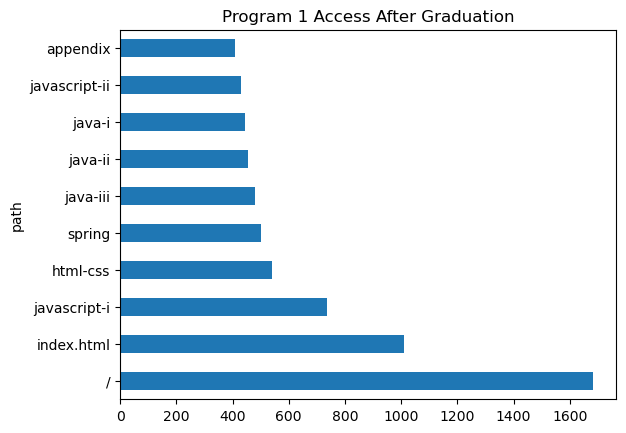

In [40]:
# Program 1 plot for access after graduation
pgm1[grad_access]['path'].value_counts().sort_values(ascending=False).head(10).plot.barh()
plt.title('Program 1 Access After Graduation')
plt.show()

### These are the top 10 lessons accessed after graduation for Program 1

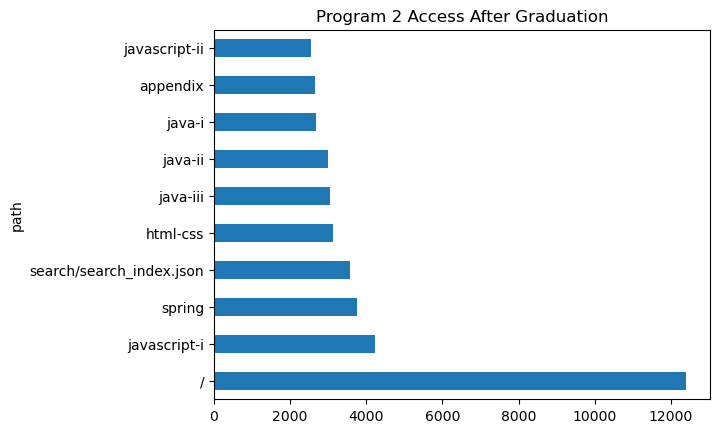

In [41]:
# Program 2 plot for access after graduation
pgm2[grad_access]['path'].value_counts().sort_values(ascending=False).head(10).plot.barh()
plt.title('Program 2 Access After Graduation')
plt.show()

### These are the top 10 lessons accessed after graduation for Program 2

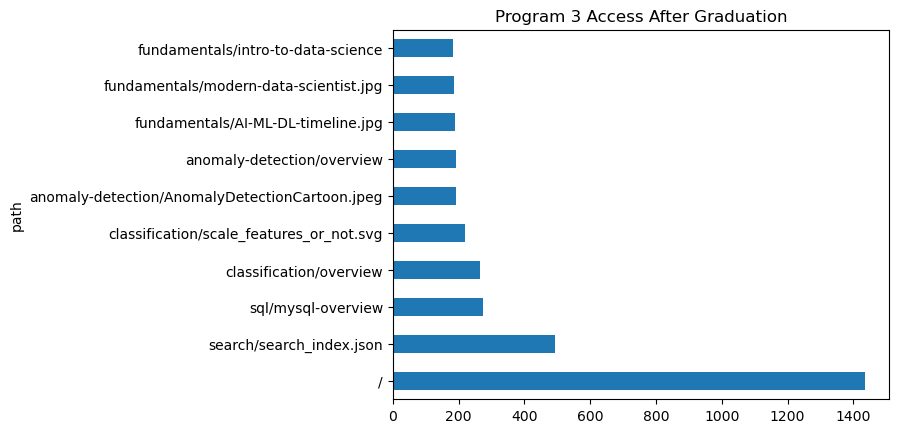

In [42]:
# Program 3 plot for access after graduation
pgm3[grad_access]['path'].value_counts().sort_values(ascending=False).head(10).plot.barh()
plt.title('Program 3 Access After Graduation')
plt.show()

### These are the top 10 lessons accessed after graduation for Program 3

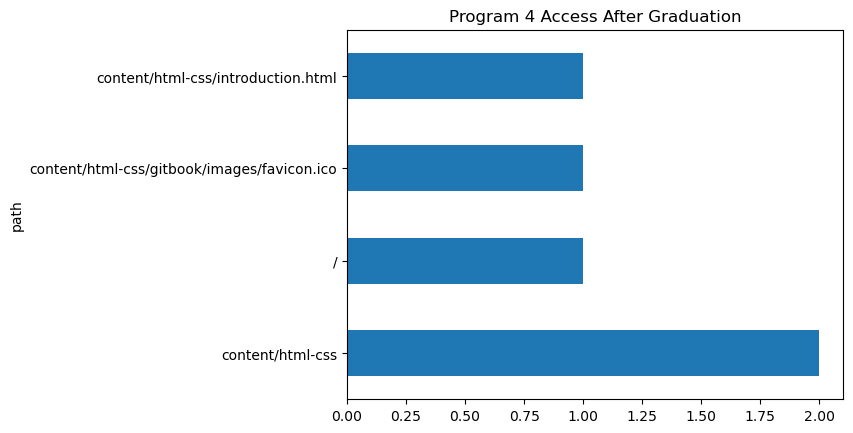

In [43]:
# Program 4 plot for access after graduation
pgm4[grad_access]['path'].value_counts().sort_values(ascending=False).head(10).plot.barh()
plt.title('Program 4 Access After Graduation')
plt.show()

### These are the top 4 lessons accessed after graduation for Program 4

### 5. Which lessons are least accessed?

In [44]:
# Using the file startpoint to find the proportion of access
path_df = df.startpoint.value_counts().reset_index()
path_df2 = df.startpoint.value_counts(normalize=True).reset_index()
path_df = pd.merge(path_df, path_df2, how='inner', on='startpoint')
path_df.tail(10)

,startpoint,count,proportion
745,javascript-functions,1,0.000001
746,handouts,1,0.000001
747,learn-to-code,1,0.000001
748,wp-login,1,0.000001
749,register.,1,0.000001
750,13-storytelling,1,0.000001
751,2-sql,1,0.000001
752,wp-admin,1,0.000001
753,.git,1,0.000001
754,8._Time_Series.md,1,0.000001


### Theres quite a bit that seems to be least accessed equally here

## Conclusion

### Key Findings

### 1. Which lesson appears to attract the most traffic consistently across cohorts (per program)?

### Program 1 - Javascript i <p>
### Program 2 - Javascript i<p>
### Program 3 - Classification<p>
### Program 4 - HTML-CSS<p>

### 2. Is there a cohort that referred to a lesson significantly more than other cohorts seemed to gloss over?

### We can say that the 'Apollo' Cohort spent alot more time in HTML-CSS than others from 40% proportion of access.

### 3. Are there students who, when active, hardly access the curriculum? If so, what information do you have about these students?

### Low access to lessons TOP 10: <p>
Users that dropped courses: 918, 879, 940, 619, 388 956<p>
User 832: Didn't access course until halfway through course<p>
User 278: Accessed more after graduating and appeared to have access to both DS and Webdev access.<p>
User 539: Graduated and then became a Staff member<p>
User 812: Accessed more after graduation than during course.<p>


### 4. What topics are grads continuing to reference after graduation and into their jobs (for each program)?

The top 3 per program were:<p>
Program 1 and 2 (WebDev): Javascript-i, Spring, HTML-CSS<p>
Program 3 (DS): SQL, Classification, Anomaly-Detection<p>

### 5. Which lessons are least accessed?

### There are alot of lessons that were accessed appx 0.000001% of the time.
The first 10 are:<p>
javascript-functions<p>
handouts	<p>
learn-to-code	<p>
wp-login	<p>
register.	<p>
13-storytelling	<p>
2-sql	<p>
wp-admin	<p>
.git	<p>
8._Time_Series.md	<p>

### Recommendations

With more time I could've answered all questions pertaining to the received request. I recommend making a category for lessons in the future to make working with the data easier.